In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [16]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

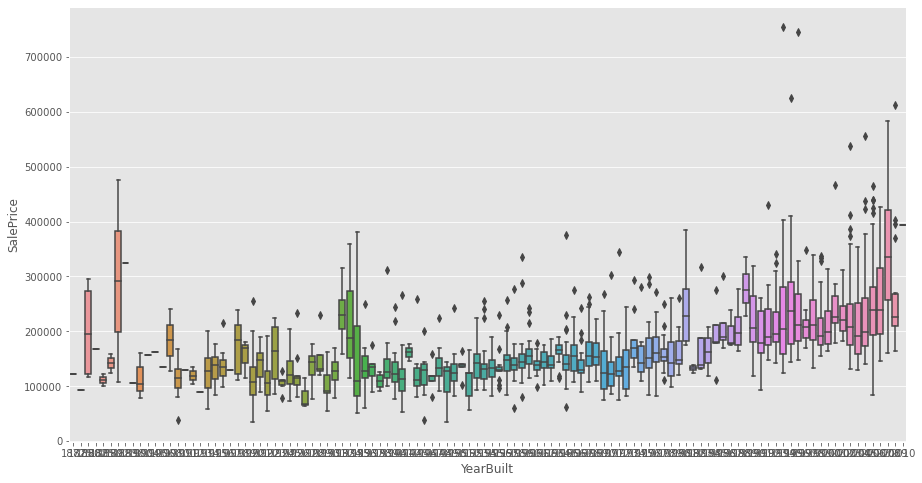

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(train.YearBuilt, train.SalePrice)


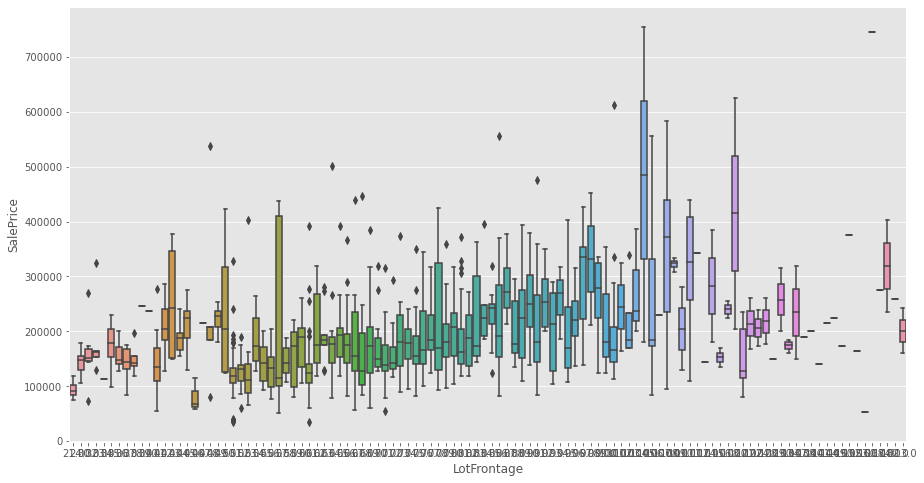

In [18]:
plt.figure(figsize=(15,8))
sns.boxplot(train.LotFrontage, train.SalePrice)

(0.0, 800000.0)

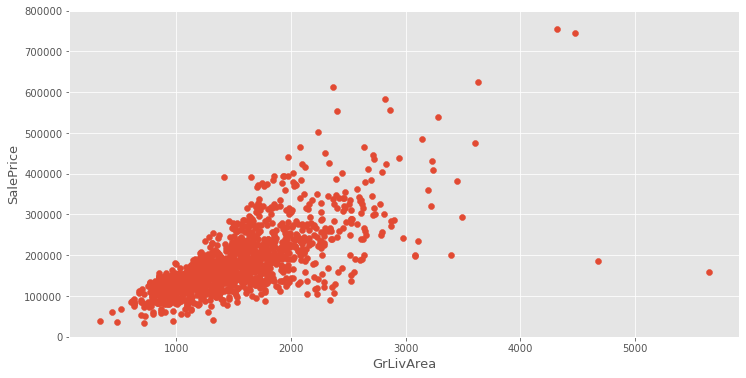

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(x=train.GrLivArea, y=train.SalePrice)
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

In [20]:
train.drop(train[(train["GrLivArea"]>4000)&(train["SalePrice"]<300000)].index,inplace=True)

(0.0, 800000.0)

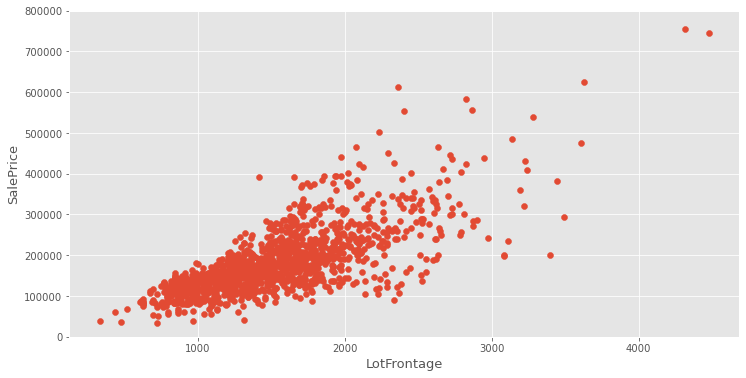

In [21]:
plt.figure(figsize=(12,6))
plt.scatter(x=train.GrLivArea, y=train.SalePrice)
plt.xlabel("LotFrontage", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

In [22]:
train.drop(train[(train["LotFrontage"]>4000)&(train["SalePrice"]<300000)].index,inplace=True)

In [23]:
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']

In [24]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [26]:
discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25 and feature not in year_feature]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [27]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [29]:
train[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


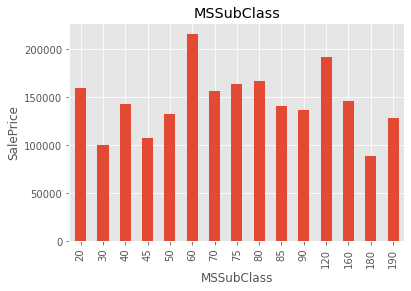

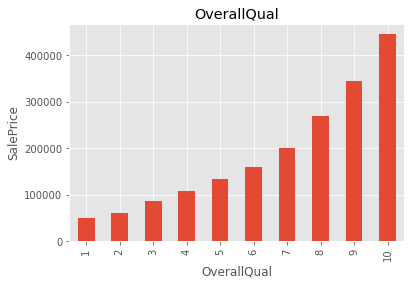

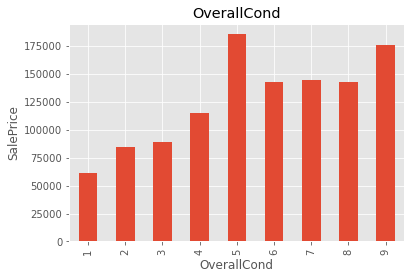

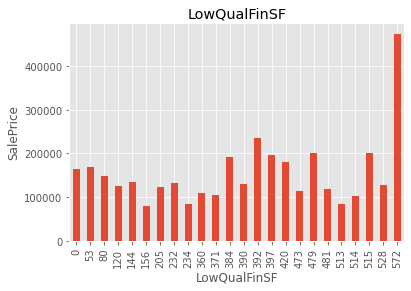

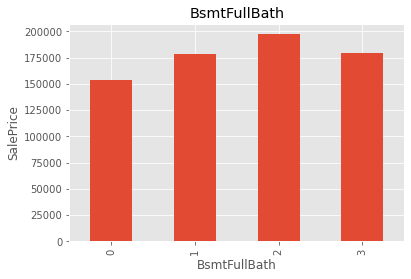

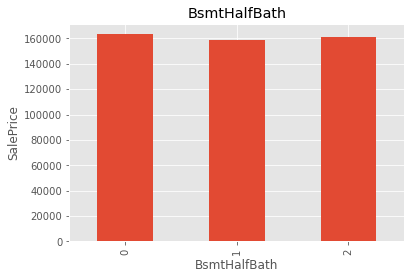

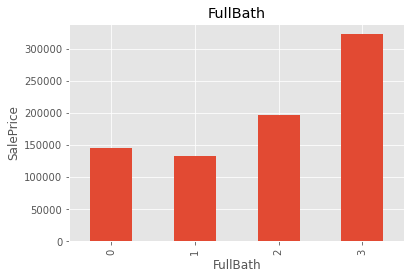

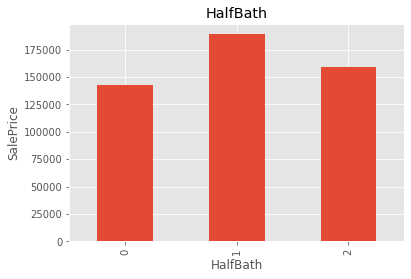

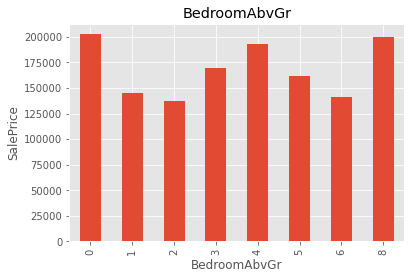

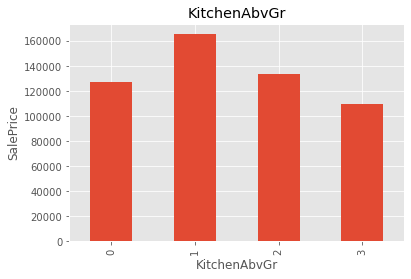

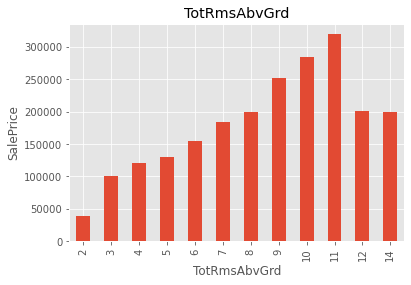

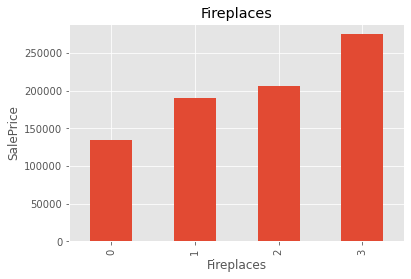

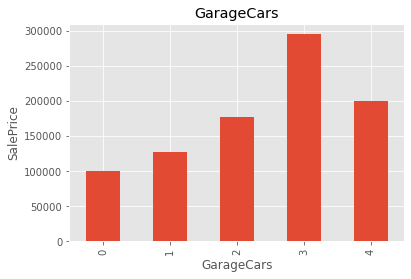

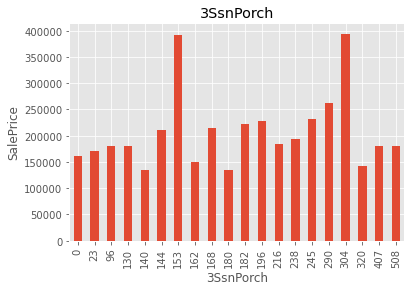

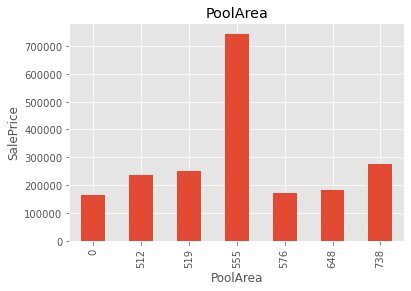

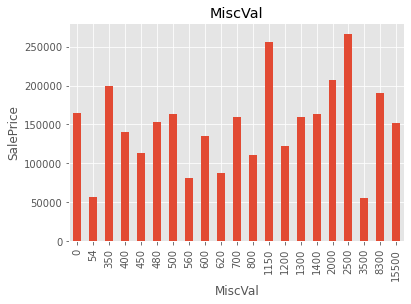

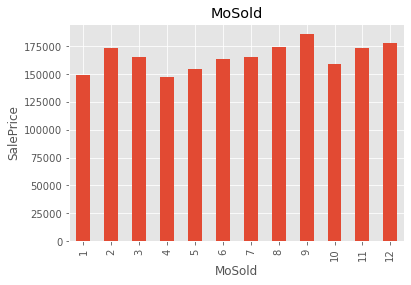

In [30]:
for feature in discrete_feature:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [31]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]

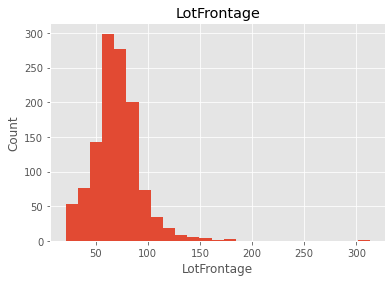

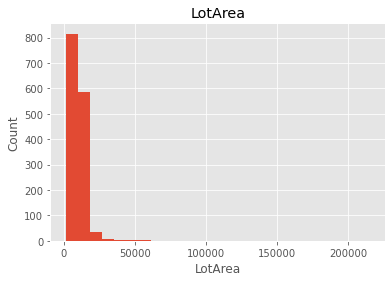

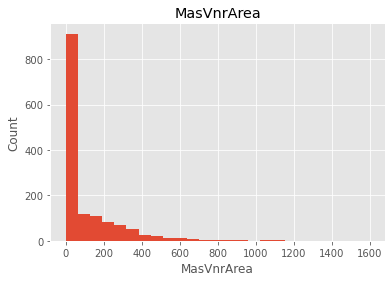

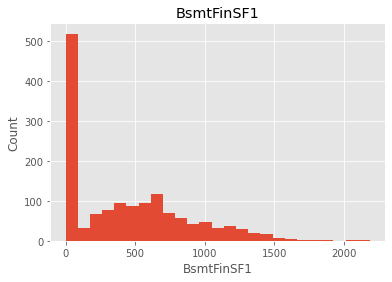

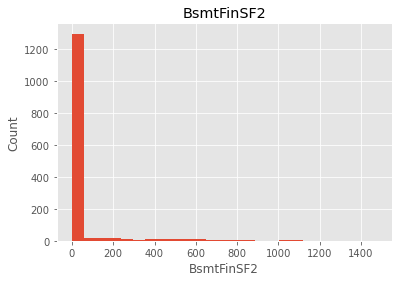

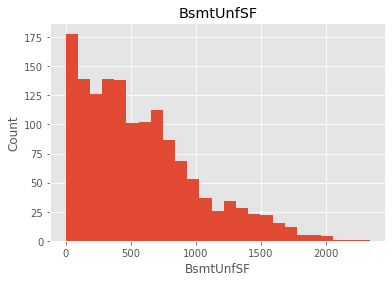

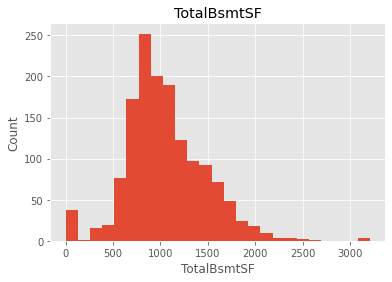

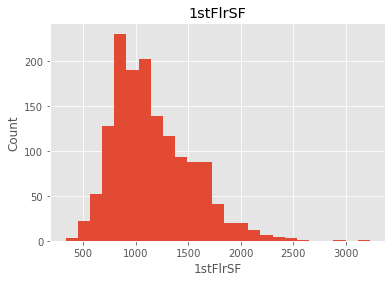

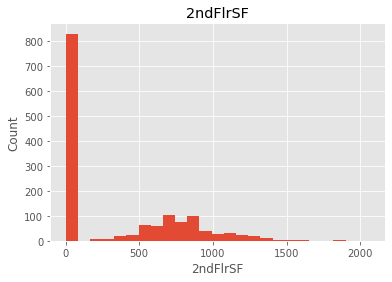

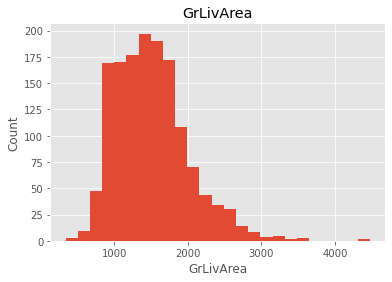

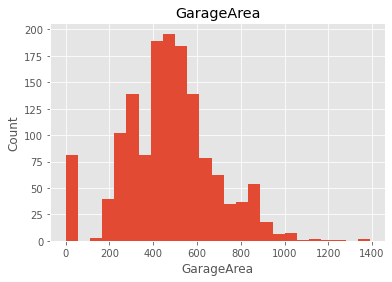

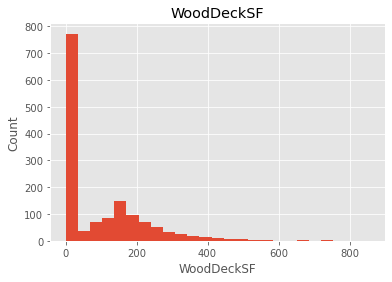

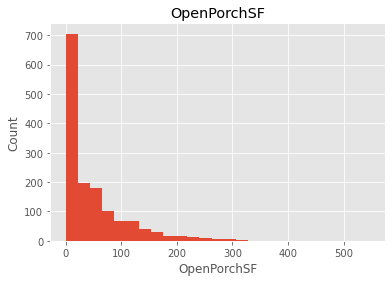

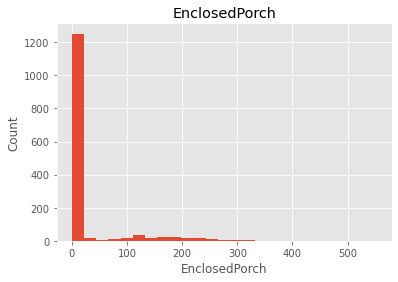

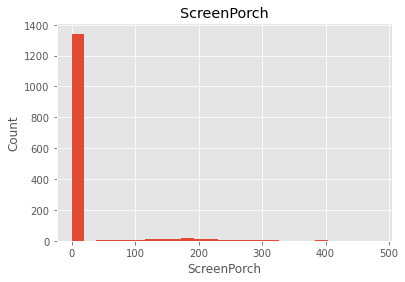

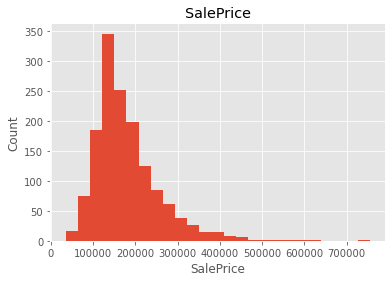

In [32]:

for feature in continuous_feature:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [33]:
full=pd.concat([train,test], ignore_index=True)

In [34]:
full.drop(['Id'],axis=1, inplace=True)
full.shape

(2917, 80)

In [35]:

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    full[feature]=full['YrSold']-full[feature]

In [36]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    full[feature]=np.log(full[feature])

In [37]:
full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,20,RL,4.382027,9.169518,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,60,RL,4.219508,9.328123,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,70,RL,4.094345,9.164296,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,60,RL,4.430817,9.565214,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


In [38]:
cols=["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in cols:
    full[col].fillna(0, inplace=True)

In [39]:
cols1 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for col in cols1:
    full[col].fillna(full[col].mode()[0], inplace=True)

In [40]:
missing_values=full.isnull().sum()/len(full)*100

In [41]:
del_cols=[]
for i in range(len(missing_values)):
    if missing_values[i] > 55.0:   
        print("{} has {:.2f}% missing values".format(full.columns[i],missing_values[i]))
        del_cols.append(full.columns[i])

Alley has 93.21% missing values
PoolQC has 99.69% missing values
Fence has 80.43% missing values
MiscFeature has 96.40% missing values


In [42]:
del_cols

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [43]:
full.drop(del_cols, inplace=True,axis=1)

In [44]:
def imputer(dataset):
    for col in dataset.columns:
        
        if dataset[col].dtypes=='object':
            dataset[col].fillna(dataset[col].mode()[0],inplace=True)
        elif dataset[col].dtypes=='int64' or dataset[col].dtypes=='float64':
            dataset[col].fillna(dataset[col].mean(),inplace=True)            

    return dataset

In [45]:
full=imputer(full)

In [46]:
full.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [47]:
NumStr = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr","KitchenAbvGr","MoSold","YrSold","YearBuilt","YearRemodAdd","LowQualFinSF","GarageYrBlt"]
for col in NumStr:
    full[col]=full[col].astype(str)

In [48]:
col=['MSSubClass','MSZoning','Neighborhood','Condition1','BldgType','HouseStyle','Exterior1st','MasVnrType','ExterQual','Foundation','BsmtQual','BsmtExposure','Heating','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','PavedDrive','SaleType','SaleCondition']
for col in col:
    le = LabelEncoder()
    full[col] = le.fit_transform(full[col])

In [49]:
X = pd.get_dummies(full)
full.shape

(2917, 76)

In [50]:
X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]
X["TotalHouse_OverallQual"] = X["TotalHouse"] * X["OverallQual"]
X["GrLivArea_OverallQual"] = X["GrLivArea"] * X["OverallQual"]
X["MSZoning_TotalHouse"] = X["MSZoning"] * X["TotalHouse"]
X["MSZoning_OverallQual"] = X["MSZoning"] + X["OverallQual"]
X["Neighborhood_TotalHouse"] = X["Neighborhood"] * X["TotalHouse"]
X["Neighborhood_OverallQual"] = X["Neighborhood"] + X["OverallQual"]
X["BsmtFinSF1_OverallQual"] = X["BsmtFinSF1"] * X["OverallQual"]
X["Functional_TotalHouse"] = X["Functional"] * X["TotalHouse"]
X["-Functional_OverallQual"] = X["Functional"] + X["OverallQual"]
X["LotArea_OverallQual"] = X["LotArea"] * X["OverallQual"]
X["TotalHouse_LotArea"] = X["TotalHouse"] + X["LotArea"]
X["Condition1_TotalHouse"] = X["Condition1"] * X["TotalHouse"]
X["Condition1_OverallQual"] = X["Condition1"] + X["OverallQual"]
X["Bsmt"] = X["BsmtFinSF1"] + X["BsmtFinSF2"] + X["BsmtUnfSF"]
X["Rooms"] = X["FullBath"]+X["TotRmsAbvGrd"]
X["PorchArea"] = X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]
X["TotalPlace"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]

X.shape 
            

(2917, 539)

In [51]:
dataset=X.copy()
feature_scale=[feature for feature in dataset.columns if feature not in ['SalePrice']]


scaler=StandardScaler()
scaler.fit(dataset[feature_scale])

StandardScaler()

In [52]:
data = pd.concat([dataset[[ 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [53]:
y= train.SalePrice

In [54]:
n_train=train.shape[0]
X_new = data[:n_train]
test_X = data[n_train:]
test_X =test_X.drop(['SalePrice'], axis = 1)

In [55]:
test_X.head()
test_X.shape

(1459, 538)

In [56]:
abs(X_new.corr()["SalePrice"][abs(X_new.corr()["SalePrice"])>0.5].drop('SalePrice')).index.tolist()

['OverallQual',
 'ExterQual',
 'BsmtQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'TotalHouse',
 'TotalArea',
 'TotalHouse_OverallQual',
 'GrLivArea_OverallQual',
 'MSZoning_TotalHouse',
 'MSZoning_OverallQual',
 'Neighborhood_TotalHouse',
 'BsmtFinSF1_OverallQual',
 'Functional_TotalHouse',
 '-Functional_OverallQual',
 'LotArea_OverallQual',
 'TotalHouse_LotArea',
 'Condition1_TotalHouse',
 'Condition1_OverallQual',
 'Bsmt',
 'Rooms',
 'TotalPlace']

In [57]:
X_train=X_new.copy()
y_train=X_train[['SalePrice']]
X_train=X_train.drop(['SalePrice'],axis=1)

In [58]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [59]:
feature_sel_model.get_support()

array([False,  True, False,  True, False, False, False,  True, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True, False,  True,  True,
        True, False, False,  True, False, False,  True,  True, False,
        True,  True, False, False, False,  True, False, False, False,
        True,  True, False, False, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,

In [60]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]


print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 538
selected features: 93


In [61]:
selected_feat

Index(['MSZoning', 'LotArea', 'HouseStyle', 'OverallCond', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinSF2', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'FullBath',
       'KitchenQual', 'Fireplaces', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'WoodDeckSF', 'ScreenPorch', 'SaleCondition', 'Street_Grvl',
       'LotShape_Reg', 'LandContour_HLS', 'LotConfig_CulDSac',
       'Condition2_Norm', 'YearBuilt_0', 'YearBuilt_1', 'YearBuilt_107',
       'YearBuilt_111', 'YearBuilt_117', 'YearBuilt_127', 'YearBuilt_136',
       'YearBuilt_16', 'YearBuilt_3', 'YearBuilt_48', 'YearBuilt_65',
       'YearBuilt_7', 'YearBuilt_75', 'YearBuilt_80', 'YearBuilt_88',
       'YearBuilt_89', 'YearBuilt_91', 'YearBuilt_93', 'YearBuilt_98',
       'YearBuilt_99', 'YearRemodAdd_0', 'YearRemodAdd_51', 'YearRemodAdd_56',
       'YearRemodAdd_58', 'YearRemodAdd_59', 'YearRemodAdd_60',
       'Exterior2nd_Stone', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd 

In [62]:
X_train_1=X_train[selected_feat]

In [63]:
X_train_1.head()

,MSZoning,LotArea,HouseStyle,OverallCond,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,HeatingQC,1stFlrSF,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageFinish,GarageCars,PavedDrive,WoodDeckSF,ScreenPorch,SaleCondition,Street_Grvl,LotShape_Reg,LandContour_HLS,LotConfig_CulDSac,Condition2_Norm,YearBuilt_0,YearBuilt_1,YearBuilt_107,YearBuilt_111,YearBuilt_117,YearBuilt_127,YearBuilt_136,YearBuilt_16,YearBuilt_3,YearBuilt_48,YearBuilt_65,YearBuilt_7,YearBuilt_75,YearBuilt_80,YearBuilt_88,YearBuilt_89,YearBuilt_91,YearBuilt_93,YearBuilt_98,YearBuilt_99,YearRemodAdd_0,YearRemodAdd_51,YearRemodAdd_56,YearRemodAdd_58,YearRemodAdd_59,YearRemodAdd_60,Exterior2nd_Stone,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,ExterCond_Fa,ExterCond_TA,BsmtCond_Fa,BsmtFinType1_GLQ,BsmtFinType1_Unf,CentralAir_N,Electrical_Mix,Electrical_SBrkr,LowQualFinSF_120,LowQualFinSF_156,LowQualFinSF_371,LowQualFinSF_392,LowQualFinSF_479,BsmtFullBath_0.0,BsmtFullBath_3.0,HalfBath_1,BedroomAbvGr_5,KitchenAbvGr_2,GarageYrBlt_0.0,GarageYrBlt_1.0,GarageYrBlt_107.0,GarageYrBlt_29.697606961566354,GarageYrBlt_32.0,GarageYrBlt_62.0,GarageYrBlt_66.0,GarageYrBlt_67.0,GarageYrBlt_73.0,GarageYrBlt_75.0,GarageYrBlt_99.0,GarageCond_Fa,MoSold_5,TotalHouse_OverallQual,Functional_TotalHouse,LotArea_OverallQual,Condition1_OverallQual,TotalPlace
0,-0.042171,-0.101721,1.032451,-0.507503,-1.267124,-0.761403,0.835104,-0.296516,0.623886,0.601514,-0.293134,-0.880860,-0.778393,0.570275,0.783237,-0.418920,-0.924763,-0.281677,0.307738,0.315148,-0.740089,-0.286041,0.205764,-0.064271,0.754403,-0.207131,-0.253397,0.100208,-0.20167,-0.284202,-0.041437,-0.018519,-0.032086,-0.026194,-0.018519,-0.087174,-0.144917,-0.110201,-0.058651,-0.133397,-0.032086,-0.064271,-0.089149,-0.083088,-0.055632,-0.066907,-0.058651,-0.066907,-0.297377,-0.103641,-0.199822,-0.163558,-0.165754,-0.120866,-0.0454,1.368902,-0.393434,-0.153326,0.387604,-0.192279,1.563304,-0.684136,-0.268388,-0.018519,0.304154,-0.018519,-0.018519,-0.018519,-0.018519,-0.018519,-1.187747,-0.026194,1.325552,-0.129347,-0.215104,-0.23119,-0.265441,-0.018519,-0.240105,-0.133397,-0.052441,-0.049046,-0.066907,-0.041437,-0.032086,-0.018519,-0.161335,-0.395175,0.611375,0.664633,0.572317,0.504970,0.533631
1,-0.042171,0.149463,-0.536122,2.187374,0.386657,0.668741,-0.540389,-0.296516,-1.159431,1.213983,-0.293134,-0.880860,0.429746,-0.369413,0.783237,0.782643,0.626435,-0.281677,0.307738,0.315148,1.615438,-0.286041,0.205764,-0.064271,0.754403,-0.207131,-0.253397,0.100208,-0.20167,-0.284202,-0.041437,-0.018519,-0.032086,-0.026194,-0.018519,-0.087174,-0.144917,-0.110201,-0.058651,-0.133397,-0.032086,-0.064271,-0.089149,-0.083088,-0.055632,-0.066907,-0.058651,-0.066907,-0.297377,-0.103641,-0.199822,-0.163558,-0.165754,-0.120866,-0.0454,-0.730513,-0.393434,-0.153326,0.387604,-0.192279,-0.639671,-0.684136,-0.268388,-0.018519,0.304154,-0.018519,-0.018519,-0.018519,-0.018519,-0.018519,0.841930,-0.026194,-0.754403,-0.129347,-0.215104,-0.23119,-0.265441,-0.018519,-0.240105,-0.133397,-0.052441,-0.049046,-0.066907,-0.041437,-0.032086,-0.018519,-0.161335,2.530524,-0.266116,-0.130218,-0.031735,-0.651229,-0.320823
2,-0.042171,0.461688,1.032451,-0.507503,-1.267124,-0.761403,0.835104,-0.296516,-0.267773,0.106135,-0.293134,-0.880860,-0.553986,0.704782,0.783237,-0.418920,0.626435,-0.281677,0.307738,0.315148,-0.740089,-0.286041,0.205764,-0.064271,-1.325552,-0.207131,-0.253397,0.100208,-0.20167,-0.284202,-0.041437,-0.018519,-0.032086,-0.026194,-0.018519,-0.087174,-0.144917,-0.110201,-0.058651,7.496404,-0.032086,-0.064271,-0.089149,-0.083088,-0.055632,-0.066907,-0.058651,-0.066907,-0.297377,-0.103641,-0.199822,-0.163558,-0.165754,-0.120866,-0.0454,1.368902,-0.393434,-0.153326,0.387604,-0.192279,1.563304,-0.684136,-0.268388,-0.018519,0.304154,-0.018519,-0.018519,-0.018519,-0.018519,-0.018519,-1.187747,-0.026194,1.325552,-0.129347,-0.215104,-0.23119,-0.265441,-0.018519,-0.240105,-0.133397,-0.052441,-0.049046,-0.066907,-0.041437,-0.032086,-0.018519,-0.16

In [64]:
X_test=test_X[selected_feat]
X_test.head()

,MSZoning,LotArea,HouseStyle,OverallCond,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,HeatingQC,1stFlrSF,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageFinish,GarageCars,PavedDrive,WoodDeckSF,ScreenPorch,SaleCondition,Street_Grvl,LotShape_Reg,LandContour_HLS,LotConfig_CulDSac,Condition2_Norm,YearBuilt_0,YearBuilt_1,YearBuilt_107,YearBuilt_111,YearBuilt_117,YearBuilt_127,YearBuilt_136,YearBuilt_16,YearBuilt_3,YearBuilt_48,YearBuilt_65,YearBuilt_7,YearBuilt_75,YearBuilt_80,YearBuilt_88,YearBuilt_89,YearBuilt_91,YearBuilt_93,YearBuilt_98,YearBuilt_99,YearRemodAdd_0,YearRemodAdd_51,YearRemodAdd_56,YearRemodAdd_58,YearRemodAdd_59,YearRemodAdd_60,Exterior2nd_Stone,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,ExterCond_Fa,ExterCond_TA,BsmtCond_Fa,BsmtFinType1_GLQ,BsmtFinType1_Unf,CentralAir_N,Electrical_Mix,Electrical_SBrkr,LowQualFinSF_120,LowQualFinSF_156,LowQualFinSF_371,LowQualFinSF_392,LowQualFinSF_479,BsmtFullBath_0.0,BsmtFullBath_3.0,HalfBath_1,BedroomAbvGr_5,KitchenAbvGr_2,GarageYrBlt_0.0,GarageYrBlt_1.0,GarageYrBlt_107.0,GarageYrBlt_29.697606961566354,GarageYrBlt_32.0,GarageYrBlt_62.0,GarageYrBlt_66.0,GarageYrBlt_67.0,GarageYrBlt_73.0,GarageYrBlt_75.0,GarageYrBlt_99.0,GarageCond_Fa,MoSold_5,TotalHouse_OverallQual,Functional_TotalHouse,LotArea_OverallQual,Condition1_OverallQual,TotalPlace
1458,-1.560849,0.525729,-0.536122,0.390790,0.386657,0.668741,-0.540389,0.835602,0.623886,0.065604,0.557914,1.414846,-0.636254,-1.428859,-1.027145,0.782643,-0.924763,0.941019,-1.004648,0.315148,0.366534,1.849478,0.205764,-0.064271,0.754403,-0.207131,-0.253397,0.100208,-0.20167,-0.284202,-0.041437,-0.018519,-0.032086,-0.026194,-0.018519,-0.087174,-0.144917,-0.110201,-0.058651,-0.133397,-0.032086,-0.064271,-0.089149,-0.083088,-0.055632,-0.066907,-0.058651,-0.066907,-0.297377,-0.103641,-0.199822,-0.163558,-0.165754,-0.120866,-0.0454,1.368902,-0.393434,-0.153326,0.387604,-0.192279,-0.639671,-0.684136,-0.268388,-0.018519,0.304154,-0.018519,-0.018519,-0.018519,-0.018519,-0.018519,0.84193,-0.026194,-0.754403,-0.129347,-0.215104,-0.23119,-0.265441,-0.018519,-0.240105,-0.133397,-0.052441,-0.049046,-0.066907,-0.041437,-0.032086,-0.018519,-0.161335,-0.395175,-0.898131,-0.805616,-0.631225,-1.229329,-0.306991
1459,-0.042171,0.929383,-0.536122,0.390790,-1.267124,0.668741,-0.540389,0.835602,0.623886,1.090138,-0.293134,1.414846,0.590742,-0.209407,-1.027145,-0.418920,-0.924763,0.941019,-1.004648,0.315148,2.366361,-0.286041,0.205764,-0.064271,-1.325552,-0.207131,-0.253397,0.100208,-0.20167,-0.284202,-0.041437,-0.018519,-0.032086,-0.026194,-0.018519,-0.087174,-0.144917,-0.110201,-0.058651,-0.133397,-0.032086,-0.064271,-0.089149,-0.083088,-0.055632,-0.066907,-0.058651,-0.066907,-0.297377,-0.103641,-0.199822,-0.163558,-0.165754,-0.120866,-0.0454,-0.730513,2.541723,-0.153326,0.387604,-0.192279,-0.639671,-0.684136,-0.268388,-0.018519,0.304154,-0.018519,-0.018519,-0.018519,-0.018519,-0.018519,0.84193,-0.026194,1.325552,-0.129347,-0.215104,-0.23119,-0.265441,-0.018519,-0.240105,-0.133397,-0.052441,-0.049046,-0.066907,-0.041437,-0.032086,-0.018519,-0.161335,-0.395175,-0.185928,-0.011151,0.141760,-0.073130,-0.385197
1460,-0.042171,0.868143,1.032451,-0.507503,0.386657,0.668741,0.835104,-0.296516,0.623886,0.792911,-0.293134,0.266993,-0.527039,0.420173,0.783237,0.782643,0.626435,-1.504373,0.307738,0.315148,0.935655,-0.286041,0.205764,-0.064271,-1.325552,-0.207131,-0.253397,0.100208,-0.20167,-0.284202,-0.041437,-0.018519,-0.032086,-0.026194,-0.018519,-0.087174,-0.144917,-0.110201,-0.058651,-0.133397,-0.032086,-0.064271,-0.089149,-0.083088,-0.055632,-0.066907,-0.058651,-0.066907,-0.297377,-0.103641,-0.199822,-0.163558,-0.165754,-0.120866,-0.0454,1.368902,-0.393434,-0.153326,0.387604,-0.192279,1.563304,-0.684136,-0.268388,-0.018519,0.304154,-0.018519,-0.018519,-0.018519,-0.018519,-0.018519,0.84193,-0.026194,1.325552,-0.129347,-0.215104,-0.23119,-0.265441,-0.018519,-0.240105,-0.133397,-0.052441,-0.049046,-0.066907,-0.041437,-0.032086,-0.018519,-0.16

# Linear regression

In [65]:
regressor = LinearRegression()  
regressor.fit(X_train_1,y_train)

LinearRegression()

In [66]:
y_pred = np.expm1(regressor .predict(X_test))

In [67]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission_f.csv',index=False)

# Random forest

In [68]:

rf_base = RandomForestRegressor(n_estimators=400)

In [69]:
rf_base.fit(X_train_1, y_train)
y_pred_rf_base = np.expm1(rf_base.predict(X_test))

In [70]:
pred=pd.DataFrame(y_pred_rf_base)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission_fin.csv',index=False)

# Principal component analysis

In [71]:

pca = PCA()
x_pca = pca.fit_transform(X_train_1)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92
0,2.187668,-0.131337,0.441920,-0.690538,-1.251163,1.281911,-0.309653,-0.144259,0.224455,-0.596455,0.227507,0.056240,0.008052,0.026598,0.559951,0.231852,0.145762,-0.008838,-1.723847,-0.359532,0.885893,0.598505,0.111721,-0.262912,0.349307,0.568876,0.442708,-0.023199,-0.296551,-0.009960,-0.169341,-0.502540,-0.228553,-0.582858,-0.542304,-0.291872,0.278333,-0.272421,-0.471130,0.248467,0.482996,-0.393760,-0.092475,-0.196227,-0.080154,-0.205623,-0.435833,-0.181313,-0.190031,0.066269,0.393221,0.248546,-0.064394,1.015332,0.100743,0.773185,0.020889,0.574190,-0.283002,0.482791,0.218674,-0.413739,0.109547,0.176717,-0.017674,0.473805,0.017905,-0.201345,0.425871,-0.002058,-0.096135,-0.391062,-0.390599,-0.227154,0.330940,-0.028430,-0.155331,-0.147394,-0.001340,0.247655,-0.159046,-0.593216,-0.121409,-0.008848,-0.199917,0.077480,-0.065166,0.103967,0.018204,-0.138046,-0.006777,-0.036202,5.687190e-16
1,-0.284530,-0.413710,1.186402,-0.811965,0.132324,-0.627424,-0.097699,-0.136142,-0.102407,-0.172974,0.155365,-0.060445,-0.140063,-0.051325,0.090060,-0.152362,-0.278940,-0.130987,0.908095,0.226178,-0.028467,0.485663,-0.954487,1.019832,-0.283500,-0.165138,-0.327738,-0.430800,-0.533338,0.603663,0.584581,1.652284,-0.361372,0.762757,-0.181947,1.134428,0.341217,0.384128,-0.131866,0.382981,-0.164102,-0.681916,-0.620229,-0.217809,0.038671,0.082012,0.147458,0.176687,0.709637,0.412620,-0.432892,-0.287242,0.622192,-0.858646,0.103042,-1.117671,0.438560,-0.431647,0.639813,0.033908,0.229325,0.244665,-0.230784,0.045268,0.057598,-1.115179,-1.081850,-0.457323,-0.540901,-0.697251,0.191615,0.429957,-0.169381,0.811135,-0.153921,0.037832,0.253382,1.672073,-0.333337,-0.125598,-0.090719,-0.330227,-0.049522,0.359490,0.529589,0.131226,-0.539244,-0.020849,-0.311069,-0.161624,0.056731,-0.003527,4.670565e-16
2,3.117669,-0.158843,0.995647,-0.259054,-1.847918,1.403436,-0.169848,-0.066724,0.109050,-0.316127,0.121690,0.246968,-0.028771,-0.094764,0.379716,0.556749,0.173502,-0.221343,-2.092583,-0.689204,0.192234,-0.558239,0.181502,-0.269757,0.008705,0.452875,0.457840,0.327480,-0.098107,-0.644444,-0.438930,-1.841964,-0.460760,-1.474312,-2.972844,1.069613,1.603504,-1.595195,-0.672641,0.604019,-0.561975,2.983643,-0.448297,0.375524,-0.116869,0.793714,1.737541,1.735704,-0.559488,0.347073,-1.276328,-1.324510,0.362223,-2.380622,-0.822304,0.348166,0.325712,1.019970,-0.798192,-0.417568,-0.982378,0.361798,-0.479232,0.329058,-0.308769,0.471754,0.369446,0.692364,0.052087,0.579153,-0.786876,-0.341864,-0.171174,-0.231081,-0.309930,0.219005,-0.252748,-0.252111,-0.128684,0.122725,0.264366,-0.558427,-0.255357,0.066106,-0.111260,-0.262529,0.356398,0.052744,0.014514,0.065434,-0.046008,-0.017907,6.060763e-16
3,-0.438206,-0.135405,2.049428,1.745623,0.383258,-0.645014,0.194151,0.181334,0.178035,0.557630,-0.116240,-0.642970,0.184209,0.332801,-1.149994,0.104550,-0.828465,0.758564,0.998540,2.373032,6.566802,1.264211,-4.331059,-5.042673,-8.047569,-4.906950,9.228865,1.277315,4.367760,-2.166872,-0.675595,-2.154271,1.035724,0.970924,0.521050,1.448346,-0.161185,2.274480,-0.212494,-0.539427,-1.052756,-0.420134,0.516755,-1.122426,-0.199651,1.183462,-1.374022,1.551802,-0.253859,2.029115,0.387989,0.725493,0.888149,-0.678938,0.788188,0.936655,-0.155619,-1.238715,-1.676011,-0.304868,-1.750202,0.389398,0.161851,0.326442,0.723053,0.489329,0.096411,0.427422,0.311186,-0.326617,0.683925,-1.804683,-0.641803,-0.930815,-0.548401,0.344354,0.960090,-0.722332,0.702260,-0.393207,0.139590,0.569164,-0.291002,0.463925,0.718340,-0.134698,0.749853,0.242620,0.107734,-0.154498,-0.013873,-0.011840,5.011579e-16
4,4.919614,-0.107778,1.784178,0.135532,-0.460617,0.808342,-0.039084,-0.051492,-0.290569,-0.222146,0.242038,-0.008268,0.104997,-0.081472,-0.024711,0.118201,-0.109117,

In [72]:
explained_variance = pca.explained_variance_ratio_


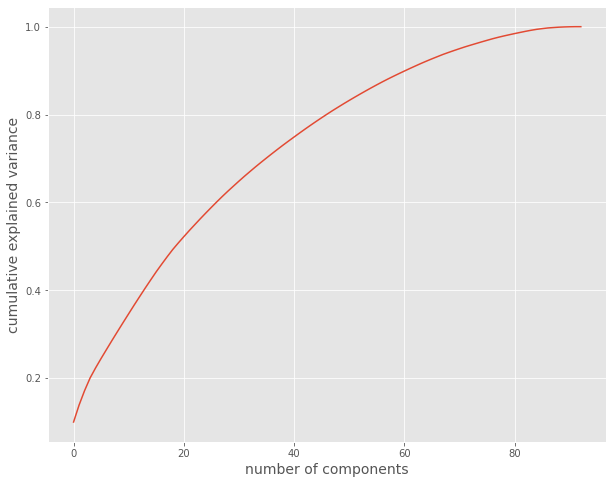

In [73]:
plt.figure(figsize = (10, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components', fontsize = 14)
plt.ylabel('cumulative explained variance', fontsize = 14)

plt.grid(True);

In [89]:
pca = PCA(n_components=80)

In [90]:
X_train_pca = pca.fit_transform(X_train_1) 
X_test_pca = pca.transform(X_test)

In [91]:
regressor = LinearRegression()  
regressor.fit(X_train_pca,y_train)

LinearRegression()

In [92]:
y_pred = np.expm1(regressor .predict(X_test_pca))

In [93]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission_fina.csv',index=False)

In [94]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
rf_base = RandomForestRegressor(n_estimators=250)

In [95]:
from sklearn import metrics

rf_base.fit(X_train_pca, y_train)
y_pred_rf_base = np.expm1(rf_base.predict(X_test_pca))

In [96]:
pred=pd.DataFrame(y_pred_rf_base)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission_fin.csv',index=False)

# Neural Network

In [82]:
import tensorflow as tf
model= tf.keras.models.Sequential(
    layers=[
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=10,activation=tf.nn.relu),
        tf.keras.layers.Dense(units=10,activation=tf.nn.relu),
         tf.keras.layers.Dense(units=10,activation=tf.nn.relu),
        tf.keras.layers.Dense(units=10,activation=tf.nn.relu),
        tf.keras.layers.Dense(units=10,activation=tf.nn.relu),
        tf.keras.layers.Dense(units=10,activation=tf.nn.relu),
         tf.keras.layers.Dense(units=10,activation=tf.nn.relu),
        tf.keras.layers.Dense(units=10,activation=tf.nn.relu),
        tf.keras.layers.Dense(units=10,activation=tf.nn.relu),
        tf.keras.layers.Dense(units=10,activation=tf.nn.relu),

        
        
        
        
       
      
        tf.keras.layers.Dense(units=1)
    ]
)

In [83]:
model.compile(loss='mse', optimizer='adam',
              metrics=['mse'])

In [84]:
model.fit(x=np.array(X_train_1),y=np.array(y_train),batch_size=16,epochs=100,verbose=2,validation_split=0.2,shuffle=True)

Epoch 1/100
73/73 - 0s - loss: 132.5225 - mse: 132.5225 - val_loss: 98.0647 - val_mse: 98.0647
Epoch 2/100
73/73 - 0s - loss: 28.7896 - mse: 28.7896 - val_loss: 7.6656 - val_mse: 7.6656
Epoch 3/100
73/73 - 0s - loss: 6.1818 - mse: 6.1818 - val_loss: 3.8802 - val_mse: 3.8802
Epoch 4/100
73/73 - 0s - loss: 3.2277 - mse: 3.2277 - val_loss: 2.4402 - val_mse: 2.4402
Epoch 5/100
73/73 - 0s - loss: 1.9149 - mse: 1.9149 - val_loss: 1.8181 - val_mse: 1.8181
Epoch 6/100
73/73 - 0s - loss: 1.2332 - mse: 1.2332 - val_loss: 1.3508 - val_mse: 1.3508
Epoch 7/100
73/73 - 0s - loss: 0.9011 - mse: 0.9011 - val_loss: 1.1362 - val_mse: 1.1362
Epoch 8/100
73/73 - 0s - loss: 0.6766 - mse: 0.6766 - val_loss: 0.9552 - val_mse: 0.9552
Epoch 9/100
73/73 - 0s - loss: 0.5360 - mse: 0.5360 - val_loss: 0.8247 - val_mse: 0.8247
Epoch 10/100
73/73 - 0s - loss: 0.4363 - mse: 0.4363 - val_loss: 0.7334 - val_mse: 0.7334
Epoch 11/100
73/73 - 0s - loss: 0.3630 - mse: 0.3630 - val_loss: 0.6521 - val_mse: 0.6521
Epoch 12/10

73/73 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0457 - val_mse: 0.0457
Epoch 93/100
73/73 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0572 - val_mse: 0.0572
Epoch 94/100
73/73 - 0s - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0466 - val_mse: 0.0466
Epoch 95/100
73/73 - 0s - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0479 - val_mse: 0.0479
Epoch 96/100
73/73 - 0s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0452 - val_mse: 0.0452
Epoch 97/100
73/73 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0447 - val_mse: 0.0447
Epoch 98/100
73/73 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0442 - val_mse: 0.0442
Epoch 99/100
73/73 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0494 - val_mse: 0.0494
Epoch 100/100
73/73 - 0s - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0450 - val_mse: 0.0450


In [87]:
y_pred_tf = np.expm1(model .predict(X_test))

In [88]:
pred=pd.DataFrame(y_pred_tf)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission_final_tf.csv',index=False)

# Hyperparameter tuning

In [106]:
import xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500,learning_rate=0.1)

In [105]:
xgb.fit(X_train_pca, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
y_pred_xgb = np.expm1(model .predict(X_test))

In [100]:
pred=pd.DataFrame(y_pred_xgb)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission_final_xgb.csv',index=False)